In [203]:
import pandas as pd
import matplotlib.pyplot as plt

import pymc as pm

In [204]:
click_df = pd.read_csv("clicks_findings.csv")
click_df = click_df.rename(columns={"Unnamed: 0": "clicks_slope"})
click_df

,clicks_slope,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
0,Intercept,3.809,3.721,-3.240,10.626,0.111,0.079,1121.0,1661.0,1.0
1,slopetab_nopic_clicks,0.861,3.781,-6.128,8.045,0.112,0.079,1145.0,1652.0,1.0
2,slopelist_nopic_clicks,-0.090,3.771,-7.156,6.945,0.111,0.079,1145.0,1730.0,1.0
3,slopeparagraph_nopic_clicks,-0.385,3.782,-7.905,6.313,0.112,0.080,1133.0,1741.0,1.0
4,slopetab_pic_clicks,1.492,3.755,-5.554,8.510,0.112,0.079,1128.0,1730.0,1.0
5,slopelist_pic_clicks,0.480,3.766,-6.622,7.631,0.112,0.079,1142.0,1685.0,1.0
6,slopeparagraph_pic_clicks,0.468,3.781,-6.506,7.568,0.113,0.080,1117.0,1593.0,1.0
7,sigma,2.779,0.213,2.385,3.171,0.004,0.003,3148.0,2863.0,1.0


In [205]:
# Create the features and response
XClicks = click_df.loc[1:6, ["clicks_slope", "mean"]]
XClicks

,clicks_slope,mean
1,slopetab_nopic_clicks,0.861
2,slopelist_nopic_clicks,-0.090
3,slopeparagraph_nopic_clicks,-0.385
4,slopetab_pic_clicks,1.492
5,slopelist_pic_clicks,0.480
6,slopeparagraph_pic_clicks,0.468


In [206]:
time_df = pd.read_csv("time_findings.csv")
time_df = time_df.rename(columns={"Unnamed: 0": "times_slope"})
time_df

,times_slope,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
0,Intercept,48.775,9.941,31.801,68.599,0.103,0.075,9366.0,3012.0,1.0
1,slopetab_nopic_clicks,10.775,10.241,-7.968,30.657,0.107,0.128,9096.0,2372.0,1.0
2,slopelist_nopic_clicks,9.333,10.173,-9.990,27.272,0.099,0.132,10468.0,2580.0,1.0
3,slopeparagraph_nopic_clicks,3.179,9.946,-14.797,23.399,0.104,0.174,9117.0,2678.0,1.0
4,slopetab_pic_clicks,13.168,10.035,-6.430,31.168,0.106,0.117,9062.0,2342.0,1.0
5,slopelist_pic_clicks,6.961,9.885,-10.925,25.939,0.098,0.133,10186.0,2882.0,1.0
6,slopeparagraph_pic_clicks,4.928,10.083,-14.170,24.188,0.101,0.167,10045.0,2853.0,1.0
7,sigma,949.776,5.038,940.189,959.186,0.052,0.037,9453.0,2921.0,1.0


In [207]:
# Create the features and response
XTime = time_df.loc[1:6, ["times_slope", "mean"]]
XTime

,times_slope,mean
1,slopetab_nopic_clicks,10.775
2,slopelist_nopic_clicks,9.333
3,slopeparagraph_nopic_clicks,3.179
4,slopetab_pic_clicks,13.168
5,slopelist_pic_clicks,6.961
6,slopeparagraph_pic_clicks,4.928


In [208]:
Results = pd.DataFrame()
Results["mean"] = XClicks["mean"] / XTime["mean"]
Results["Category"] = time_df.loc[1:6, "times_slope"].to_list()
Results.set_index("Category", inplace=True)
Results.sort_values(by="mean", inplace=True, ascending=False)
Results

,mean
Category,
slopetab_pic_clicks,0.113305
slopeparagraph_pic_clicks,0.094968
slopetab_nopic_clicks,0.079907
slopelist_pic_clicks,0.068956
slopelist_nopic_clicks,-0.009643
slopeparagraph_nopic_clicks,-0.121107


In [209]:
# slope tab pic clicks has 0.1133 clicks per unit of time

In [210]:
Results_2 = pd.DataFrame()

Results_2["Norm Clicks"] = click_df["mean"][0] + XClicks["mean"]
Results_2["Norm Time"] = time_df["mean"][0] + XTime["mean"]
Results_2["Rate"] = Results_2["Norm Clicks"] / Results_2["Norm Time"]
Results_2["Category"] = time_df.loc[1:6, "times_slope"].to_list()
Results_2.set_index("Category", inplace=True)
Results_2.sort_values(by="Rate", inplace=True, ascending=False)
Results_2

,Norm Clicks,Norm Time,Rate
Category,,,
slopetab_pic_clicks,5.301,61.943,0.085579
slopeparagraph_pic_clicks,4.277,53.703,0.079642
slopetab_nopic_clicks,4.670,59.550,0.078421
slopelist_pic_clicks,4.289,55.736,0.076952
slopeparagraph_nopic_clicks,3.424,51.954,0.065904
slopelist_nopic_clicks,3.719,58.108,0.064002


In [222]:
import matplotlib.pyplot as plt
import numpy as np

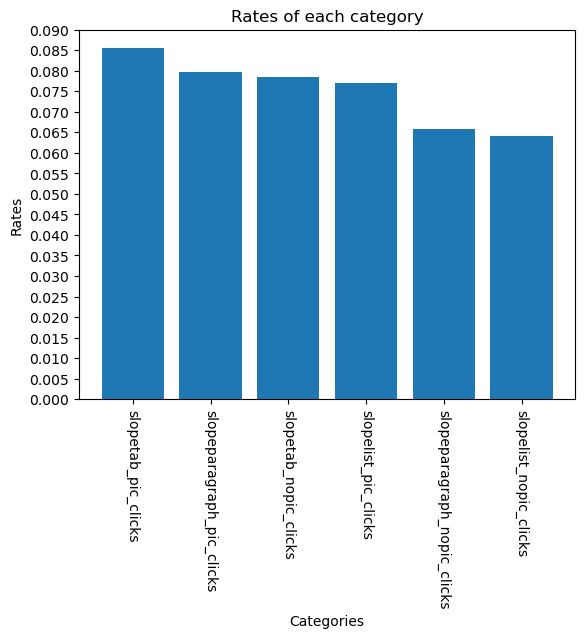

In [249]:
Categories = Results_2.index.to_list()
Rates = Results_2["Rate"].to_list()

plt.bar(x=Categories, height=Rates)
plt.xticks(rotation=270)

plt.xlabel("Categories")
plt.ylabel("Rates")
plt.title("Rates of each category")

plt.yticks(np.arange(0, max(Rates) + 0.005, step=0.005))

plt.show()

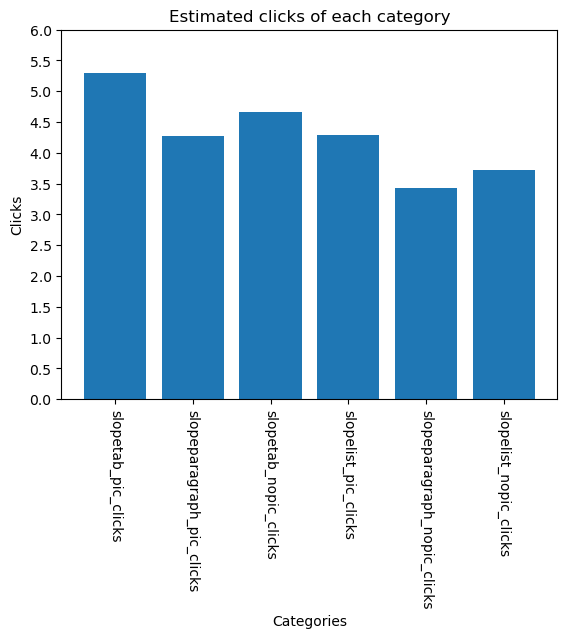

In [228]:
ClickNorm = Results_2["Norm Clicks"].to_list()

plt.bar(x=Categories, height=ClickNorm)
plt.xticks(rotation=270)

plt.xlabel("Categories")
plt.ylabel("Clicks")
plt.title("Estimated clicks of each category")

plt.yticks(np.arange(0, max(ClickNorm)+1, step=0.5))

plt.show()

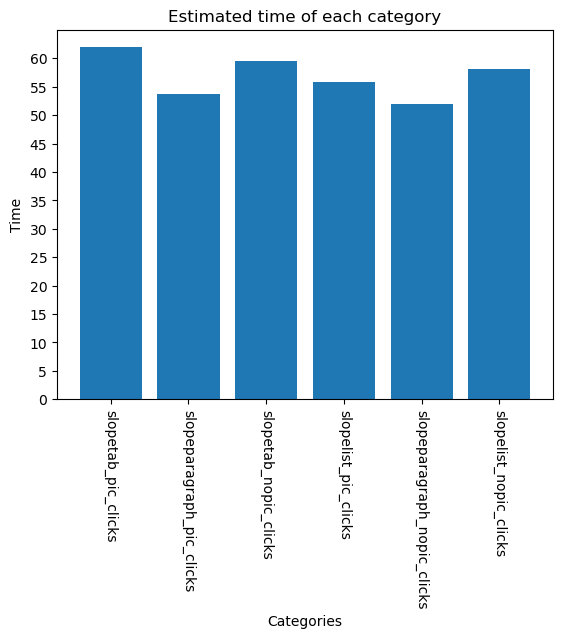

In [231]:
TimeNorm = Results_2["Norm Time"].to_list()

plt.bar(x=Categories, height=TimeNorm)
plt.xticks(rotation=270)

plt.xlabel("Categories")
plt.ylabel("Time")
plt.title("Estimated time of each category")

plt.yticks(np.arange(0, max(TimeNorm)+1, step=5))

plt.show()